In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pulki\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv(r"C:\Users\pulki\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
# Defining a function to map ratings to sentiment labels
def map_rating_to_sentiment(rating):
    if rating >= 3:
        return 'positive'
    else:
        return 'negative'

# Applying the function to create a new column containing sentiment labels
df['Sentiment'] = df['Ratings'].apply(map_rating_to_sentiment)
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,positive
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative


In [5]:
# Checking for null values in the dataset
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
Sentiment            0
dtype: int64


In [6]:
# Dropping rows with null values, if any
df.dropna(inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
# Displaying the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
 8   Sentiment        8013 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 563.5+ KB


In [9]:
# Display the first few rows of the dataset
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,negative
3,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,positive
4,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,positive


In [10]:
import spacy
# Loading the 'en_core_web_sm' 
nlp = spacy.load("en_core_web_sm")

## Data Preprocessing

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Function for text cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and punctuation
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Get stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    clean_text = ' '.join(tokens)  # Join tokens back into text
    return clean_text


# Applying text cleaning to the review text column
df['cleaned_text'] = df['Review text'].apply(clean_text)

In [12]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment,cleaned_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,positive,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,negative,didnt supplied yonex mavis outside cover yonex...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,negative,worst product damaged shuttlecock packed new b...
3,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,positive,good quality product delivered timeread
4,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,positive,best purchase good quality durable average shu...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [14]:
# BoW representation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer
from transformers import BertModel
import torch


bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

In [15]:
# Word2Vec (W2V) representation
tokenized_text = df['cleaned_text'].apply(lambda x: x.split())
w2v_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

def word_vectorizer(docs, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in docs]
    return np.array(features)

X_w2v = word_vectorizer(tokenized_text, w2v_model, 100)

## Split the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame containing the reviews and sentiment
X = df['Review text']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [17]:
X

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
3       Good quality product. Delivered on time.READ MORE
4       BEST PURCHASE It is a good quality and is more...
                              ...                        
8008    Thanks to the delivery boy ... Service is alwa...
8009    Over priced even after 50% discount price is m...
8010    Too much priced. It was getting me for Rs. 640...
8011    Hii flipkart customers care..why your delivery...
8012                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

In [18]:
y

0       positive
1       negative
2       negative
3       positive
4       positive
          ...   
8008    positive
8009    negative
8010    negative
8011    positive
8012    positive
Name: Sentiment, Length: 8013, dtype: object

In [19]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6410, 3460)
Shape of X_test: (1603, 3460)
Shape of y_train: (6410,)
Shape of y_test: (1603,)


# Logistic Regression model


In [20]:
from sklearn.metrics import f1_score

# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Logistic Regression - F1-Score: {f1_lr}")

Logistic Regression - F1-Score: 0.9040908321782416


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = logistic_regression_model.predict(X_train)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9237129485179407
f1_score: 0.9111098841953658
confusion matrix:
 [[ 325  453]
 [  36 5596]]


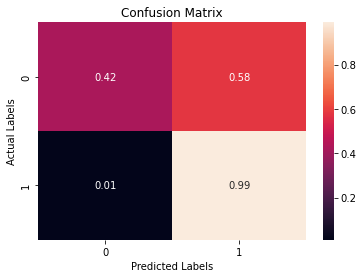

In [22]:
# Calculating the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculating row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalizing the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes model


In [23]:
# Multinomial Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print(f"Multinomial Naive Bayes - F1-Score: {f1_nb}")

Multinomial Naive Bayes - F1-Score: 0.8652418790348398


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = naive_bayes_model.predict(X_train)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9081123244929797
f1_score: 0.8827007683640274
confusion matrix:
 [[ 191  587]
 [   2 5630]]


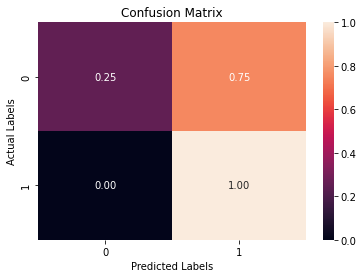

In [25]:
# Calculating the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculating row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalizing the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

# SVM model


In [26]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"Support Vector Machine - F1-Score: {f1_svm}")

Support Vector Machine - F1-Score: 0.9114646728718101


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = svm_model.predict(X_train)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9625585023400937
f1_score: 0.9603764264673872
confusion matrix:
 [[ 567  211]
 [  29 5603]]


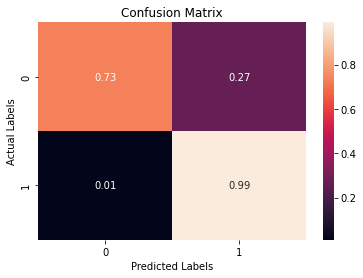

In [28]:
# Calculating the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculating row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalizing the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

# Random Forest model


In [29]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest - F1-Score: {f1_rf}")

Random Forest - F1-Score: 0.9158681264288699


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = random_forest_model.predict(X_train)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9781591263650546
f1_score: 0.9775473702576968
confusion matrix:
 [[ 661  117]
 [  23 5609]]


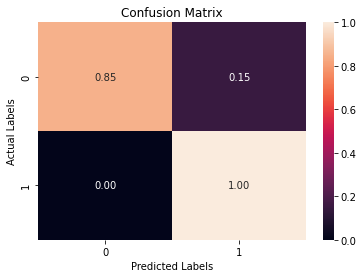

In [31]:
# Calculating the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculating row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalizing the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

# K-Nearest Neighbor model


In [32]:
# KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)
y_pred_rf = KNeighborsClassifier.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"KNN - F1-Score: {f1_rf}")

KNN - F1-Score: 0.9003110287724667


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = KNeighborsClassifier.predict(X_train)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.924804992199688
f1_score: 0.9158264976818076
confusion matrix:
 [[ 373  405]
 [  77 5555]]


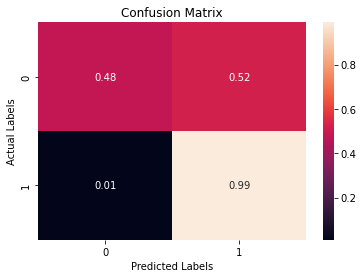

In [34]:
# Calculating the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculating row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalizing the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

# Deep learning -> Neural Network

In [35]:
# Importing Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Convert sentiment labels to numeric format
y_train_numeric = y_train.map({'positive': 1, 'negative': 0})
y_test_numeric = y_test.map({'positive': 1, 'negative': 0})


# Building a simple Neural Network
nn = Sequential()
nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(64, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(1, activation='sigmoid'))

# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training the model
nn.fit(X_train.toarray(), y_train_numeric, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test_numeric))

# Evaluating the model
_, accuracy = nn.evaluate(X_test.toarray(), y_test_numeric)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score

# Predict the test data
y_pred = nn.predict(X_test.toarray())

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the F1-score
f1 = f1_score(y_test_numeric, y_pred_binary)
print("F1-Score:", f1)




Epoch 1/10


201/201 [==============================] - 2s 7ms/step - loss: 0.3432 - accuracy: 0.8768 - val_loss: 0.2457 - val_accuracy: 0.8802
Epoch 2/10
201/201 [==============================] - 1s 6ms/step - loss: 0.2134 - accuracy: 0.9145 - val_loss: 0.2189 - val_accuracy: 0.9239
Epoch 3/10
201/201 [==============================] - 1s 7ms/step - loss: 0.1694 - accuracy: 0.9448 - val_loss: 0.2172 - val_accuracy: 0.9220
Epoch 4/10
201/201 [==============================] - 1s 6ms/step - loss: 0.1475 - accuracy: 0.9540 - val_loss: 0.2268 - val_accuracy: 0.9133
Epoch 5/10
201/201 [==============================] - 1s 7ms/step - loss: 0.1275 - accuracy: 0.9605 - val_loss: 0.2476 - val_accuracy: 0.9158
Epoch 6/10
201/201 [==============================] - 1s 7ms/step - loss: 0.1174 - accuracy: 0.9654 - val_loss: 0.2593 - val_accuracy: 0.9127
Epoch 7/10
201/201 [==============================] - 1s 7ms/step - loss: 0.1067 - accuracy: 0.9679 - val_loss: 0.2726 - val_accuracy: 0.9002
E

In [36]:
from joblib import dump

# Save the trained model as a .pkl file with full path
dump(naive_bayes_model, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/MultinomialNB_model.pkl')
dump(svm_model, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/SVC_model.pkl')
dump(logistic_regression_model, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/Logistic_Regression_model.pkl')
dump(random_forest_model, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/Random_forest_model.pkl')
dump(KNeighborsClassifier, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/KNeighbors_model.pkl')
dump(nn, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/nn.pkl')
# Save the TF-IDF vectorizer as a .pkl file with full path
dump(tfidf_vectorizer, 'C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/tfidf_vectorizer.pkl')


['C:/Users/pulki/OneDrive/Desktop/flipkart sentiment analysis/Pickle/tfidf_vectorizer.pkl']

In [41]:
from joblib import load

# Load the Random Forest model from a .pkl file
random_forest_model = load(r"C:\Users\pulki\OneDrive\Desktop\flipkart sentiment analysis\Pickle\Random_forest_model.pkl")
def predict_sentiment(input_text):
    # Preprocess the input text
    preprocess_text = clean_text(input_text)

    preprocessed_text = clean_text(preprocess_text)

    # Transform the preprocessed text into numerical features
    features = tfidf_vectorizer.transform([preprocessed_text])
    
    # Make prediction using the loaded random forest model
    prediction = random_forest_model.predict(features)[0]
    
    # Convert the prediction to human-readable format
    if prediction == "positive":
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_text ="good product"
sentiment = predict_sentiment(input_text)
print("Sentiment:", sentiment)

Sentiment: Positive


### The highest F1 score:

#### Random Forest Classifier has highest F1 score = 0.9141757582724249